Linear Regression - Mean R²: 0.8674 | Std: 0.0170
Random Forest - Mean R²: 0.9956 | Std: 0.0012
XGBoost - Mean R²: 0.9949 | Std: 0.0015


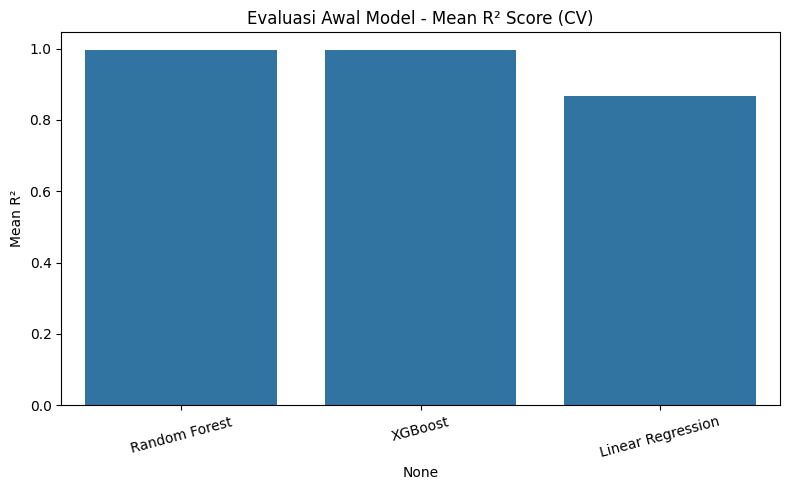

In [1]:
### 03_modeling.ipynb

# Modeling - Training dan Evaluasi Awal Model

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load data hasil eksplorasi & preparation sebelumnya
df = pd.read_csv("../data/generated/listrik_rumah.csv")

# Pisahkan fitur dan target
X = df.drop("konsumsi_listrik_kwh", axis=1)
y = df["konsumsi_listrik_kwh"]

# Deteksi fitur numerik dan kategorik
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Buat pipeline preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Evaluasi cross-validation untuk masing-masing model
cv_results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    cv_results[name] = {
        "Mean R²": np.mean(scores),
        "Std R²": np.std(scores)
    }
    print(f"{name} - Mean R²: {np.mean(scores):.4f} | Std: {np.std(scores):.4f}")

# Konversi ke DataFrame
cv_df = pd.DataFrame(cv_results).T.sort_values("Mean R²", ascending=False)

# Visualisasi hasil evaluasi awal
plt.figure(figsize=(8, 5))
sns.barplot(x=cv_df.index, y="Mean R²", data=cv_df.reset_index())
plt.title("Evaluasi Awal Model - Mean R² Score (CV)")
plt.ylabel("Mean R²")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Simpan hasil ke CSV jika dibutuhkan
cv_df.to_csv("../reports/cv_results_initial.csv")
